In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
# cmap = plt.get_cmap("coolwarm")
# cmap(np.linspace(0, 1, 5))

adj_coolwarm = LinearSegmentedColormap.from_list("adjusted_coolwarm", (
    (0.000, (0.2298057 , 0.29871797, 0.75368315)),
    (0.166, (0.55431187, 0.69009701, 0.99551555)),
    (0.333, (0.86742764, 0.8643766 , 0.86260246)),
    (0.666, (0.95665321, 0.59803382, 0.47730229)),
    (1.000, (0.70567316, 0.01555616, 0.15023281))))

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [22]:
git_dir = "/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output"
use_cts = ['Oligo_NN', 'CA1-ProS_Glut','L6_CT_CTX_Glut']
use_ct  =use_cts[0]

In [23]:
modalities =  ['methylation','atac','hic']

In [24]:
# glob all result.csv under "{git_dir}/{ct}" evene in the subfolders"
all_fps = glob.glob(f"{git_dir}/{use_ct}/**/result.csv", recursive=True)
all_fps

['/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/Oligo_NN/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/Oligo_NN/atac/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/Oligo_NN/methylation/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/Oligo_NN/hic/result.csv']

In [25]:
all_up_acc = {}
for path in all_fps:
    ml_out = pd.read_csv(path)
    ct = path.split('/')[-2]
    all_acc = ml_out[ml_out['DEG'] == ml_out['pred']].shape[0] / ml_out.shape[0]
    
    ml_out = ml_out[ml_out['DEG'] != 0]
    deg_acc = ml_out[ml_out['DEG'] == ml_out['pred']].shape[0] / ml_out.shape[0]
    all_up_acc[ct] = (all_acc, deg_acc)

all_up_acc= pd.DataFrame.from_dict(all_up_acc, orient='index', columns=['all_acc', 'deg_acc'])
#all_up_acc.index = [ 'all_modality', 'atac', 'methylation', 'hic']
all_up_acc

,all_acc,deg_acc
Oligo_NN,0.661171,0.749512
atac,0.652928,0.748861
methylation,0.609544,0.700716
hic,0.622126,0.697463


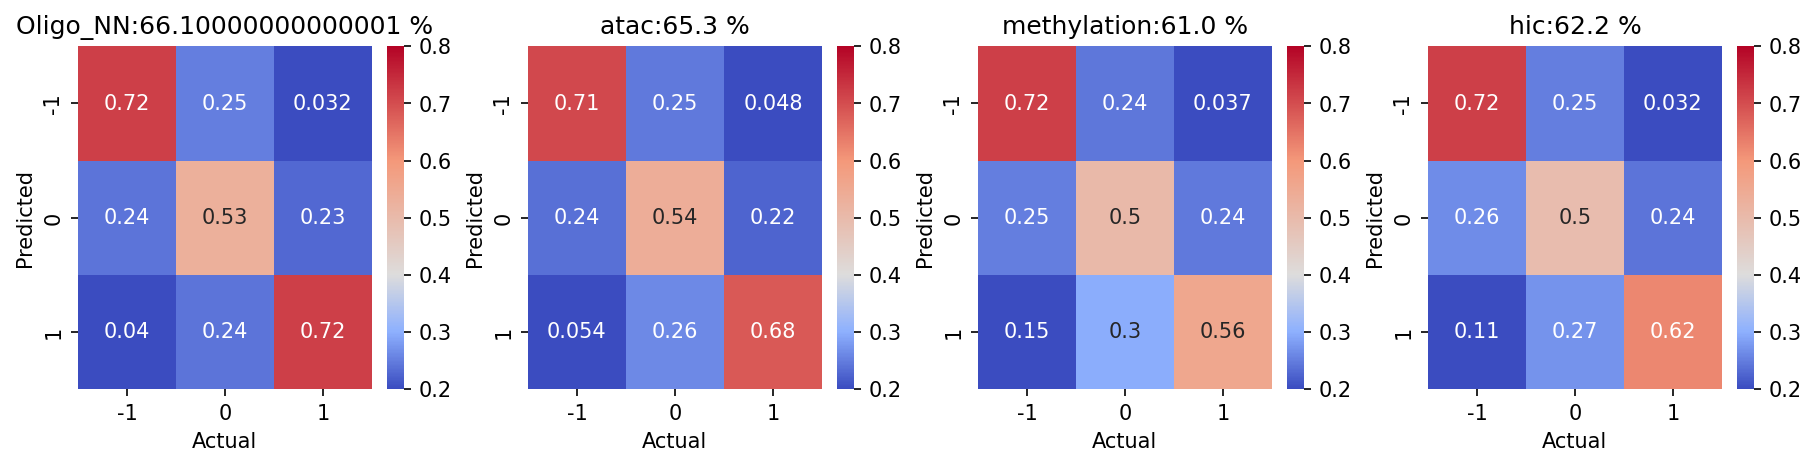

In [26]:
#matplotlib.colormaps.register(adj_coolwarm)
ncols = 4
nrows = 1
fig, axes = plt.subplots(ncols = ncols, nrows =nrows, figsize=(3*ncols, 3*nrows), dpi = 150, constrained_layout=True)

for path, ax in zip(all_fps, axes.ravel()):
    ct = path.split('/')[-2]
    ml_out = pd.read_csv(path)
    n_genes = ml_out.shape[0]
    confusion_matrix = pd.crosstab(ml_out['pred'], ml_out['DEG'], rownames=['Predicted'], colnames=['Actual'])
    confusion_matrix = confusion_matrix.div(confusion_matrix.sum(axis=1), axis=0)
    
    sns.heatmap(confusion_matrix, 
            ax =ax,
            cmap = adj_coolwarm,
            vmin = 0.2, vmax = 0.8,
            annot=True)

    deg_acc = round(all_up_acc.loc[ct, 'all_acc'],3)
    ax.set_title(f'{ct}:{deg_acc *100} %') 

fig.savefig(f'figure/{use_ct}.single-modality.accuracy.pdf', bbox_inches='tight')  